In [663]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('wine.csv')

In [664]:
df.head(10)

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L),cultivator
0,14.23,1.71,127,3.06,0.28,5.64,1065,0
1,13.20,1.78,100,2.76,0.26,4.38,1050,0
2,13.16,2.36,101,3.24,0.30,5.68,1185,0
3,14.37,1.95,113,3.49,0.24,7.80,1480,0
4,13.24,2.59,118,2.69,0.39,4.32,735,0
5,14.20,1.76,112,3.39,0.34,6.75,1450,0
6,14.39,1.87,96,2.52,0.30,5.25,1290,0
7,14.06,2.15,121,2.51,0.31,5.05,1295,0
8,13.86,1.35,98,3.15,0.22,7.22,1045,0
9,14.10,2.16,105,3.32,0.22,5.75,1510,0


In [665]:
data_reduced = df.drop(['cultivator'], axis=1)
data_reduced.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,14.23,1.71,127,3.06,0.28,5.64,1065
1,13.20,1.78,100,2.76,0.26,4.38,1050
2,13.16,2.36,101,3.24,0.30,5.68,1185
3,14.37,1.95,113,3.49,0.24,7.80,1480
4,13.24,2.59,118,2.69,0.39,4.32,735


In [666]:
# scaling the data before PCA
from sklearn.preprocessing import scale
data_reduced = pd.DataFrame(scale(data_reduced), columns=['alcohol (%v/v at 20°C)',	'malic_acid (g/L)','magnesium (mg/L)','flavanoids (mg/L)', 'nonflavanoid_phenols (mg/L)','color_intensity (units)','proline (mg/L)'])
data_reduced.head()

,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
0,1.562716,-0.591231,2.542453,1.078247,-0.755894,0.255449,0.980662
1,0.266967,-0.523908,0.201225,0.777458,-0.925743,-0.319077,0.933981
2,0.216646,0.033919,0.287937,1.258720,-0.586044,0.273688,1.354112
3,1.738838,-0.360407,1.328483,1.509377,-1.095592,1.240351,2.272176
4,0.317287,0.255126,1.762044,0.707274,0.178277,-0.346435,-0.046325


In [667]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)
pca_samples=pd.DataFrame(pca_samples)
pca_samples

,0,1,2,3,4,5
0,3.073581,0.428910,1.145812,-0.647722,-0.014157,-0.804051
1,1.413477,-0.780900,-0.096167,0.210086,-0.208219,0.162380
2,1.704442,-0.184967,-0.096864,0.180440,-0.456853,0.871176
3,3.775921,0.775342,-0.302990,0.017668,-0.154795,0.345762
4,0.915151,0.226433,1.496797,-0.588026,-0.412245,-0.340990
...,...,...,...,...,...,...
126,-0.202311,2.301137,-1.501631,0.097127,0.966683,-0.692835
127,-0.518527,2.231148,0.270915,0.420848,0.037698,-0.017051
128,0.301726,3.481525,1.262642,0.030496,0.906095,0.495298
129,0.199707,2.666727,0.732344,-1.515624,1.078001,0.113533


In [668]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions
    
    # PCA cumulative explained variance
    cum_ratios = pca.explained_variance_ratio_.cumsum().reshape(len(pca.components_), 1)
    cum_variance_ratios = pd.DataFrame(np.round(cum_ratios, 4), columns = ['Cumulative Explained Variance'])
    cum_variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, cum_variance_ratios, components], axis = 1)

In [669]:
pca_results = pca_results(data_reduced, pca)
pca_results

,Eigenvalue,Explained Variance,Cumulative Explained Variance,alcohol (%v/v at 20°C),malic_acid (g/L),magnesium (mg/L),flavanoids (mg/L),nonflavanoid_phenols (mg/L),color_intensity (units),proline (mg/L)
PC 1,3.0084,0.4265,0.4265,0.4118,-0.2166,0.3923,0.4317,-0.3888,0.1845,0.5080
PC 2,2.1718,0.3079,0.7344,0.3584,0.5076,0.2185,-0.3708,0.3265,0.5544,0.1209
PC 3,0.5888,0.0835,0.8178,-0.3204,0.3503,0.7918,0.0457,-0.1262,-0.2683,-0.2403
PC 4,0.4619,0.0655,0.8833,0.1060,0.5560,-0.3540,-0.0159,-0.7333,0.0108,-0.1272
PC 5,0.3959,0.0561,0.9395,-0.2835,-0.4337,0.1451,-0.2860,-0.3672,0.6202,-0.3305
PC 6,0.2398,0.0340,0.9734,-0.7041,0.2488,-0.1422,0.2676,0.0680,0.3140,0.4973


In [670]:
#Extract only the three PCs
pca3 = PCA(n_components=3).fit(data_reduced)
scores3 = pca3.transform(data_reduced)

In [671]:
scores3=pd.DataFrame(scores3,columns = ['PC1', 'PC2','PC3'])
scores3

,PC1,PC2,PC3
0,3.073581,0.428910,1.145812
1,1.413477,-0.780900,-0.096167
2,1.704442,-0.184967,-0.096864
3,3.775921,0.775342,-0.302990
4,0.915151,0.226433,1.496797
...,...,...,...
126,-0.202311,2.301137,-1.501631
127,-0.518527,2.231148,0.270915
128,0.301726,3.481525,1.262642
129,0.199707,2.666727,0.732344


In [672]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=5, height=5, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.1

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.05, head_length=0.05, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

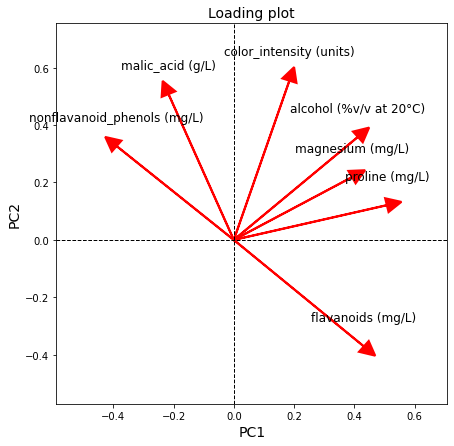

In [673]:
plt.clf
ax2 = loadingplot(data_reduced, pca3, width=7, height=7, margin=0.2)
plt.show()

In [674]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=df.cultivator)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
  
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax

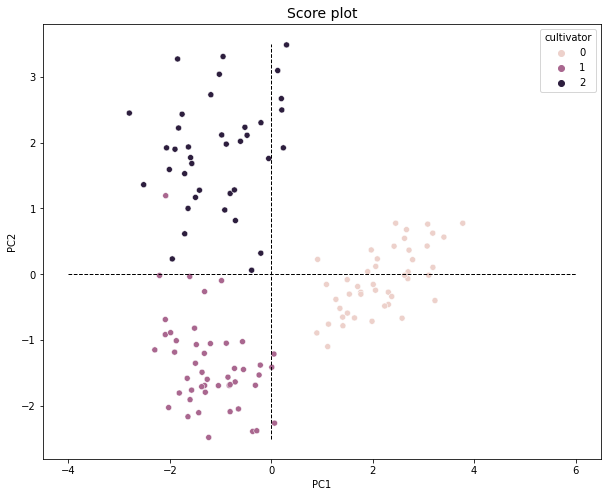

In [675]:
plt.clf
ax3 = scoreplot_label(df, scores3, pca2, width=5, height=4, margin=50)
plt.show()

In [676]:


#Finding unknown food , lets call it arr 
Alcohol_X={'alcohol (%v/v at 20°C)': 12.75 , 'nonflavanoid_phenols (mg/L)': 0.52,
'malic_acid (g/L)': 3.11,'color_intensity (units)': 4.56 ,'magnesium (mg/L)': 96 ,'proline (mg/L)': 632 ,
'flavanoids (mg/L)': 0.61 }
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data_reduced = pd.read_csv('wine.csv')
data_reduced = data_reduced.drop(['cultivator'], axis=1)
data_reduced=data_reduced.append(Alcohol_X,ignore_index=True)

In [677]:
# scaling the data before PCA
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
# data_reduced = pd.DataFrame(scale(data_reduced), columns=['alcohol (%v/v at 20°C)',	'malic_acid (g/L)','magnesium (mg/L)','flavanoids (mg/L)', 'nonflavanoid_phenols (mg/L)','color_intensity (units)','proline (mg/L)'])
# data_reduced.head()
scale.fit(data_reduced)
data_reduced =scale.transform(data_reduced)
data_reduced =pd.DataFrame(data_reduced)

In [678]:
# implementing PCA using sklearn

from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(data_reduced)
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data_reduced)
pca_samples=pd.DataFrame(pca_samples)
pca_samples

,0,1,2,3,4,5
0,3.089561,0.436470,1.160285,-0.636587,-0.015024,-0.804787
1,1.427787,-0.783541,-0.097551,0.205844,-0.213742,0.164613
2,1.717682,-0.184756,-0.099460,0.181671,-0.451377,0.874911
3,3.792808,0.785523,-0.302643,0.013423,-0.155388,0.346525
4,0.926762,0.225147,1.509078,-0.566488,-0.402098,-0.338887
...,...,...,...,...,...,...
127,-0.507736,2.224775,0.262852,0.428989,0.039604,-0.014961
128,0.313093,3.481387,1.260017,0.054833,0.919280,0.495549
129,0.214483,2.663778,0.749615,-1.499807,1.091529,0.114896
130,-0.938575,3.298260,-0.609831,0.087603,-0.037921,-0.490856


In [679]:
z1=data_reduced.iloc[-1,0]
z2=data_reduced.iloc[-1,1]
z3=data_reduced.iloc[-1,2]
z4=data_reduced.iloc[-1,3]
z5=data_reduced.iloc[-1,4]
z6=data_reduced.iloc[-1,5]
z7=data_reduced.iloc[-1,6]

In [680]:
#PC1
# ŷ= 0.4118z1-0.2166z2+0.3923z3+0.4317z4-0.3888z5+0.1845z6 + 0.5080z7
Alcohol_X_PC1 = (0.4118*z1)-(0.2166*z2)+(0.3923*z3)+(0.4317*z4)-(0.3888*z5)+(0.1845*z6)+(0.5080*z7)
#PC 2 
#ŷ= 0.3584z1+0.5076z2+0.2185z3-0.3708z4+0.3265z5+0.5544z6 + 0.1209z7
Alcohol_X_PC2 = 0.3584*z1+0.5076*z2+0.2185*z3-0.3708*z4+0.3265*z5+0.5544*z6+0.1209*z7
#PC 3
# ŷ= -0.3204z1+0.3503z2+0.7918z3+0.0457z4-0.1262z5-0.2683z6  - 0.2403z7
Alcohol_X_PC3 = -0.3204*z1+0.3503*z2+0.7918*z3+0.0457*z4-0.1262*z5-0.2683*z6-0.2403*z7

In [681]:
print("PC1 = "+str(Alcohol_X_PC1))
print("PC2 = "+str(Alcohol_X_PC2))
print("PC3 = "+str(Alcohol_X_PC3))

PC1 = -1.6534052596691293
PC2 = 0.9875695585864558
PC3 = 0.17217824801594828


In [682]:
#Extract only the three PCs
pca3 = PCA(n_components=3).fit(data_reduced)
scores3 = pca3.transform(data_reduced)
scores3=pd.DataFrame(scores3,columns=['PC1','PC2','PC3'])
scores3

,PC1,PC2,PC3
0,3.089561,0.436470,1.160285
1,1.427787,-0.783541,-0.097551
2,1.717682,-0.184756,-0.099460
3,3.792808,0.785523,-0.302643
4,0.926762,0.225147,1.509078
...,...,...,...
127,-0.507736,2.224775,0.262852
128,0.313093,3.481387,1.260017
129,0.214483,2.663778,0.749615
130,-0.938575,3.298260,-0.609831


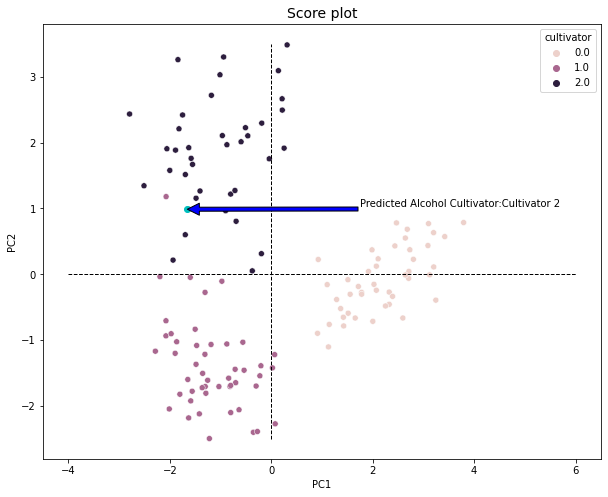

In [683]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC2", data = scores,hue=data.cultivator)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
    ax.annotate('Predicted Alcohol Cultivator:Cultivator 2',
            xy=(Alcohol_X_PC1,Alcohol_X_PC2),  # theta, radius
            xytext=(0.5, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='blue', shrink=1),
            horizontalalignment='left',
            verticalalignment='bottom')
    ax.plot(Alcohol_X_PC1,Alcohol_X_PC2, 'co')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf
ax3 = scoreplot_label(df, scores3, pca3, width=5, height=4, margin=50)
plt.show()

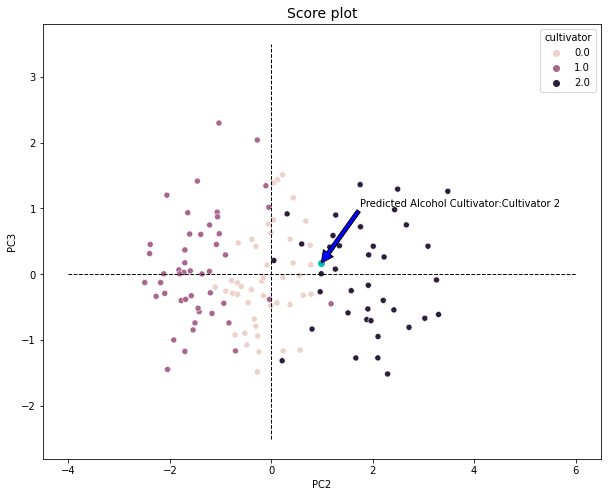

In [684]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC2", y="PC3", data = scores,hue=data.cultivator)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
    ax.annotate('Predicted Alcohol Cultivator:Cultivator 2',
            xy=(Alcohol_X_PC2,Alcohol_X_PC3),  # theta, radius
            xytext=(0.5, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='blue', shrink=1),
            horizontalalignment='left',
            verticalalignment='bottom')
    ax.plot(Alcohol_X_PC2,Alcohol_X_PC3, 'co')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf
ax3 = scoreplot_label(df, scores3, pca3, width=5, height=4, margin=50)
plt.show()

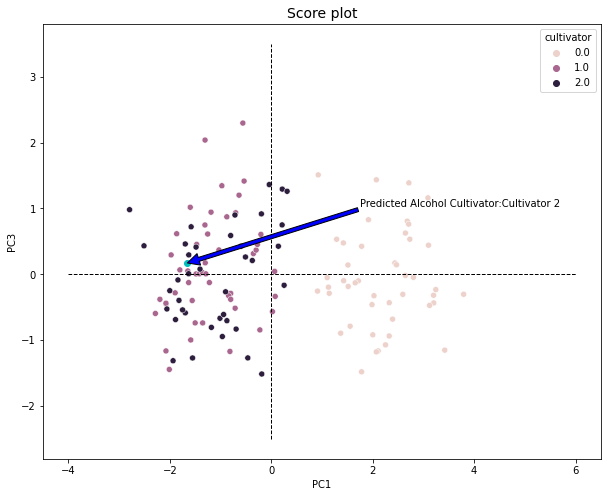

In [685]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=3, height=3, margin=0.5):
    plt.figure(figsize=(10, 8))
    ax = sns.scatterplot(x="PC1", y="PC3", data = scores,hue=data.cultivator)
    
    #Set limits for figure
#     x_min = min(scores['PC1'].min(),0)-margin
#     x_max = max(scores['PC1'].max(),0)+margin
#     y_min = min(scores['PC2'].min(),0)-margin
#     y_max = max(scores['PC2'].max(),0)+margin
    ax.annotate('Predicted Alcohol Cultivator:Cultivator 2',
            xy=(Alcohol_X_PC1,Alcohol_X_PC3),  # theta, radius
            xytext=(0.5, 0.5),    # fraction, fraction
            textcoords='figure fraction',
            arrowprops=dict(facecolor='blue', shrink=1),
            horizontalalignment='left',
            verticalalignment='bottom')
    ax.plot(Alcohol_X_PC1,Alcohol_X_PC3, 'co')
#     ax.set_xlim(x_min, x_max)
#     ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([-4, 6], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [-2.5, 3.5], color='k', linestyle='--', linewidth=1)
    return ax
plt.clf
ax3 = scoreplot_label(df, scores3, pca3, width=5, height=4, margin=50)
plt.show()